# 사전 준비

## Google IMAP 상태값 변경


### 1. Google 계정을 준비합니다.

### 2. Gmail 메인 페이지에 접속합니다.

### 3. 상단 톱니를( ⚙️) 클릭 합니다.

### 4. '모든 설정 보기' 버튼을 클릭 합니다.

### 5. 전달 및 POP/IMAP 탭을 클릭 합니다.

### 6. IMAP 액세스 / 상태 값을 'IMAP 사용'으로 변경합니다.

## Google 보안 수준 변경하기

### 1. Google 메인 페이지에 접속 합니다.

### 2. 프로필 이미지 클릭, 'Google 계정 관리' 버튼을 클릭 합니다.

### 3. 좌측 '보안' 탭을 클릭 합니다.

### 4. 액세스 사용 설정 페이지로 진입 합니다.

- (4-1) '보안 수준이 낮은 앱의 액세스' 섹션을 찾습니다. (보안 탭의 하단에 위치하고 있습니다 🙂)
- (4-2) '액세스 사용 설정(권장하지 않음)' 텍스트를 클릭 합니다.

### 5. '보안 수준이 낮은 앱'의 액세스 권한을 허용 합니다.

------------------------------

## SMTP 개념

### Simple Mail Transfer Protocol



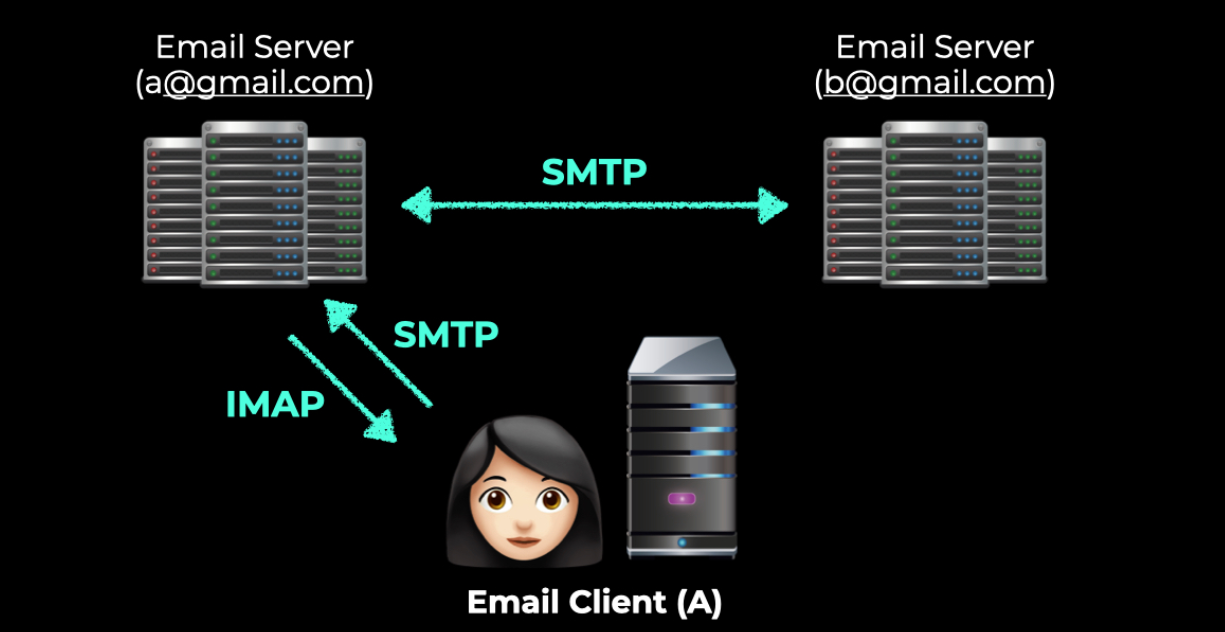

서버가 사용자에게 메일을 보낼때 사용되는게 IMAP 이다. (IMAP 설정을 허용해야 다른 이메일 서버에서 보내준 메일 혹은 우리의 전자 이메일 서버에 저장되어 있는 메일을 우리의 프로그램으로 가지고 올 수 있다.)

기본적으로 사용자가 서버에게 요청을 보내거나 서버가 서버에 요청을 보낼땐 SMTP가 사용된다.

A가 B에게 이메일을 보내고 B가 A에게 답장을 한다면?

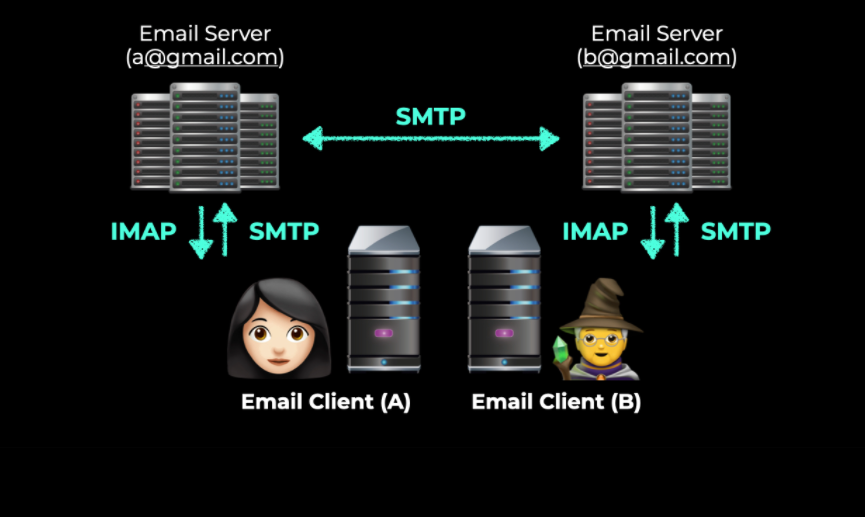

1.  SMTP로 본인의 메일 서버에 메일을 저장한다.

2. 서버에 저장된 메일을 B메일 서버로 보내게 된다 (SMTP)

3. B메일 서버는 IMAP을 사용해 B에게 메일을 전달 한다.

4. B는 답장을 써 SMTP로 B메일 서버로 보낸다.

5. B메일 서버는 A메일 서버에 SMTP를 사용해 전달

6. A메일 서버는 IMAP을 사용해 A에게 메일을 전달하게된다.

## 정리

#### SMTP 서버를 이용해서 우리가 원하는 곳으로 메일을 보낼 수 있다. (SMTP ==이메일 서버)

----------------------------------------

# SMTP 서버 주소

### SMTP 서버 역시 주소가 존재한다
EX_ address : smtp.gmail.com
EX_ Port : 465

우리가 smtp 서버에 접속할 때는 address의 port를 이용한다고 생각하면 된다.

# smtplib / 라이브러리

## 목표

1. SMTP 메일 서버를 연결한다

2. SMTP 메일 서버에 로그인한다

3. SMTP 메일 서버로 메일을 보낸다

## 서버 연결

In [4]:
import smtplib 

# 메일 서버 연결 작업

SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 465

smtp = smtplib.SMTP_SSL(SMTP_SERVER,SMTP_PORT)  # 우리가 원하는 메일 서버에 연결해주는 기능을 가지고 있다.
                                            # 먼저 서버를 찾아야한다. == 서버 주소와 포트 번호를 알아야한다.

print(smtp)  # 보안 문제 때문에 커넥션이 닫혀있다는 오류가 발생한다. (ssl 요구) ssl == 암호화 방식

# 출력 결과 : <smtplib.SMTP_SSL object at 0x00000263ED1ACC40>
# 이 같은 결과가 나왔다면 성공적으로 gmail의 ssmp 서버에 진입한것이다.
# smtp에는 ssl을 처리 할 수 있는 기능이 없기 때문에 SMTP_SSL 메서드를 사용한다.

# 서버 로그인

In [9]:
import smtplib 

SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 465

smtp = smtplib.SMTP_SSL(SMTP_SERVER,SMTP_PORT)
smtp.login("jcjk0302@gmail.com","ckdwns4028")  # 사용할 메일 주소, 비밀번호 입력
# 출력 결과 : (235, b'2.7.0 Accepted') -- 성공적으로 로그인됐다는 의미


(235, b'2.7.0 Accepted')


# 메일 보내기

In [10]:
import smtplib 

SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 465

smtp = smtplib.SMTP_SSL(SMTP_SERVER,SMTP_PORT)
smtp.login("jcjk0302@gmail.com","ckdwns4028")
smtp.send_message() # 보내려면 메일의 내용이 필요하다.
smtp.quit()

TypeError: send_message() missing 1 required positional argument: 'msg'

# MINE

SMTP는 영어를 제외 한글, 이미지 등을 인식하지 못 한다.

하지만 이 사이에 MINE를 사용한다면 인식이 가능해진다. 즉, MIME 형태로 변경해야한다.

이 때 사용하게되는게 Python의 email.message 모듈이다. (내장 모듈)

## email 만드는 3단계

* 이메일을 만든다
* 이메일에 내용을 담는다
* 발신자, 수신자를 설정한다

In [12]:
# smtplib : SMTP 메일서버로 메일을 쉽게 보낼 수 있게 해주는 라이브러리  
import smtplib 
from email.message import EmailMessage # 작성하고싶은 메일 내용을 MINE 타입으로 변환 시켜주는 모듈

# 서버 연결
SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 465

# 사용하기 편하게 변수에 담자 여기에 담으면 MINE로 바꿔준다.
message = EmailMessage() 

# MINE - Content
message.set_content("엉덩이 팡팡팡")  # 본문 집어 넣기

# set_contest 으로 하지 않는 이유 : MIME로 만들때 HEADER부분에 들어가기 때문이다.
# 즉, 본문은 헤더가 아닌 콘탠트로 들어가기 때문에 다르게 적용된다고 이해하면된다.

# MIME - Header
message["Subject"] = " 이것은 제목입니다. "
message["From"] = "jcjk0302@gmail.com"
message["To"] = "dlsthd2590@naver.com","jcjk0302@likelion.org"


# SMTP 메일 서버에 연결
smtp = smtplib.SMTP_SSL(SMTP_SERVER,SMTP_PORT)

# 로그인
smtp.login("jcjk0302@gmail.com","ckdwns4028")

# 보내고 싶은 이메일이 필요하다.
# MINE 형태만 가능하다.
# send_message()를 이용해 우리가 로그인한 계정을 이용해 메세지를 보내준다.
smtp.send_message(message) 

# 메세지를 모두 보낸 후 서버와의 연결을 끊어준다.
smtp.quit()

(221, b'2.0.0 closing connection d2sm5001569pgv.87 - gsmtp')

# 사진 첨부하기

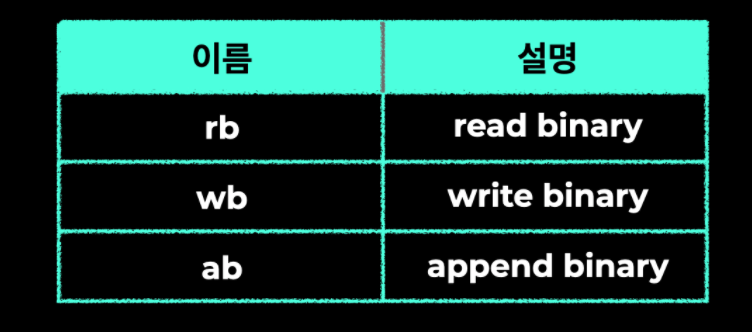

binary : 컴퓨터가 읽고 이해하기 가장 편한 문자

컴퓨터는 이미지를 파악 할 수 없기 때문에 이미지 정보를 binary로 적용해준다(jpg,png,exe,mov ...)


In [15]:
# smtplib : SMTP 메일서버로 메일을 쉽게 보낼 수 있게 해주는 라이브러리  
import smtplib 
from email.message import EmailMessage # 작성하고싶은 메일 내용을 MINE 타입으로 변환 시켜주는 모듈
import imghdr  # python 내장 모듈 : 확장자를 판단해준다.


# 서버 연결
SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 465

# 사용하기 편하게 변수에 담자 여기에 담으면 MINE로 바꿔준다.
message = EmailMessage() 

# MINE - Content
message.set_content("엉덩이 팡팡팡")  # 본문 집어 넣기

# set_contest 으로 하지 않는 이유 : MIME로 만들때 HEADER부분에 들어가기 때문이다.
# 즉, 본문은 헤더가 아닌 콘탠트로 들어가기 때문에 다르게 적용된다고 이해하면된다.

# MIME - Header
message["Subject"] = " 이것은 제목입니다. "
message["From"] = "jcjk0302@gmail.com"
message["To"] = "dlsthd2590@naver.com","jcjk0302@likelion.org"

# ---- 사진 첨부하기 ----

# with 구문을 사용해 작성하면 close문 없이도 열었던 파일을 사용한뒤 자동으로 닫게된다.
with open("si.png", "rb") as image:
   image_file = image.read()


# multipart/mixed 타입의 메일 : 텍스트뿐만 아니라 다른 타입이 함께 있을때 사용
# add_attachment(...) 메서드는 세가지의 재료가 필요하다.
#    - image
#    - maintype: 첨부한 유형의 타입 이미지면 이미지 비디오면 비디오
#    - subtype: 확장자 png, jpg ...


image_type = imghdr.what("si",image_file) # 파일명, 실제 파일 데이터
# print(image_type)
message.add_attachment(image_file, maintype='image',subtype=image_type)




# SMTP 메일 서버에 연결
smtp = smtplib.SMTP_SSL(SMTP_SERVER,SMTP_PORT)

# 로그인
smtp.login("jcjk0302@gmail.com","ckdwns4028")

# 보내고 싶은 이메일이 필요하다.
# MINE 형태만 가능하다.
# send_message()를 이용해 우리가 로그인한 계정을 이용해 메세지를 보내준다.
smtp.send_message(message) 

# 메세지를 모두 보낸 후 서버와의 연결을 끊어준다.
smtp.quit()

(221, b'2.0.0 closing connection v30sm1870430pgk.25 - gsmtp')

# 유효성 검사하기

메일을 보내고자하는 메일 주소가 유효하는지!

## 정규 표현식


문자열에서 나타나는 특정 패턴을 알아내서 대응 시키기 위해 사용되는 표현식

즉, 이메일에만 나타나는 특정한 패턴을 조건으로 주고 

이 조건에 우리의 문자열이 적합한지 적합하지않은지 판단하는것이다.

아래의 식이 조건식이다.


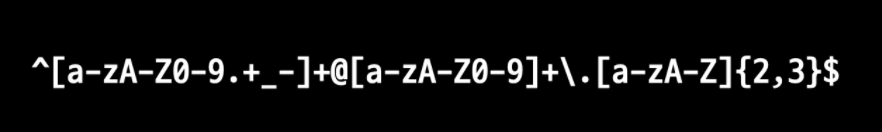

^ : 시작

$ : 끝

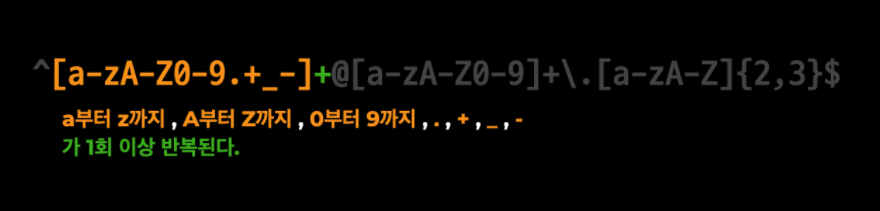

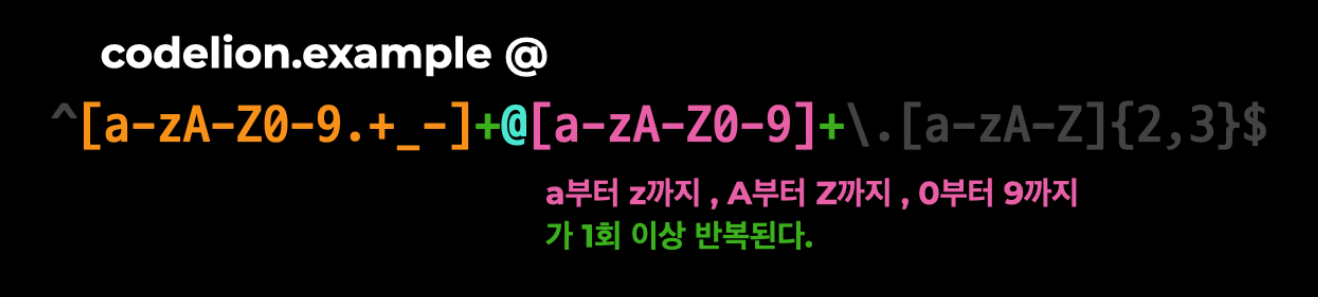

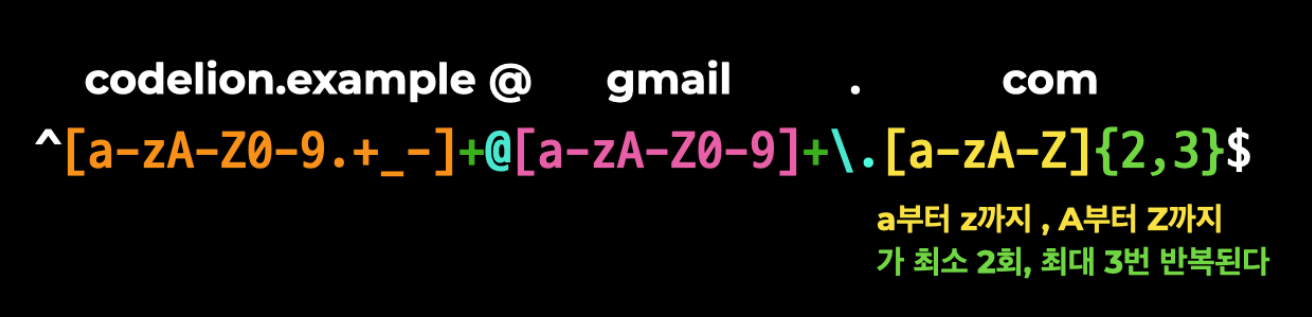

In [22]:
# smtplib : SMTP 메일서버로 메일을 쉽게 보낼 수 있게 해주는 라이브러리  
import smtplib 
from email.message import EmailMessage # 작성하고싶은 메일 내용을 MINE 타입으로 변환 시켜주는 모듈
import imghdr  # python 내장 모듈 : 확장자를 판단해준다.
import re # python의 정규 표현식 기능 사용 모듈

# 서버 연결
SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 465

def sendEmail(addr):
    
    # 정규표현식
    reg = "^[a-zA-Z0-9.+_-]+@[a-zA-Z0-9]+\.[a-zA-Z]{2,3}$"
            
    # 정규표현식, 정규표현식에 대입할 문자열이 필요하다.
    if bool(re.match(reg, addr)): 
               
        # MINE 형태만 가능하다, 보내고 싶은 이메일이 필요하다
        # send_message()를 이용해 우리가 로그인한 계정을 이용해 메세지를 보내준다.
        smtp.send_message(message)
        print("정상적으로 메일이 발송되었습니다.")
    else:
        print("유효한 이메일 주소가 아닙니다.")

# 사용하기 편하게 변수에 담자 여기에 담으면 MINE로 바꿔준다.
message = EmailMessage() 

# MINE - Content
message.set_content("엉덩이 팡팡팡")  # 본문 집어 넣기

# set_contest 으로 하지 않는 이유 : MIME로 만들때 HEADER부분에 들어가기 때문이다.
# 즉, 본문은 헤더가 아닌 콘탠트로 들어가기 때문에 다르게 적용된다고 이해하면된다.

# MIME - Header
message["Subject"] = " 이것은 제목입니다. "
message["From"] = "jcjk0302@gmail.com"
message["To"] = "dlsthd2590@naver.com","jcjk0302@likelion.org"

# ---- 사진 첨부하기 ----

# with 구문을 사용해 작성하면 close문 없이도 열었던 파일을 사용한뒤 자동으로 닫게된다.
with open("si.png", "rb") as image:
   image_file = image.read()


# multipart/mixed 타입의 메일 : 텍스트뿐만 아니라 다른 타입이 함께 있을때 사용
# add_attachment(...) 메서드는 세가지의 재료가 필요하다.
#    - image
#    - maintype: 첨부한 유형의 타입 이미지면 이미지 비디오면 비디오
#    - subtype: 확장자 png, jpg ...


image_type = imghdr.what("si",image_file) # 파일명, 실제 파일 데이터
# print(image_type)
message.add_attachment(image_file, maintype='image',subtype=image_type)


# SMTP 메일 서버에 연결
smtp = smtplib.SMTP_SSL(SMTP_SERVER,SMTP_PORT)

# 로그인
smtp.login("jcjk0302@gmail.com","ckdwns4028")
# 메일을 보내는 sendEmail 함수를 호출해서 실행해보기

# 함수 실행
sendEmail("dlsthd2590@naver.com")
# 보내고 싶은 이메일이 필요하다.
# MINE 형태만 가능하다.
# send_message()를 이용해 우리가 로그인한 계정을 이용해 메세지를 보내준다.
#smtp.send_message(message) 

# 메세지를 모두 보낸 후 서버와의 연결을 끊어준다.
smtp.quit()

유효한 이메일 주소가 아닙니다.


(221, b'2.0.0 closing connection x7sm4857377pfc.96 - gsmtp')